**Assignment 1**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Load Dataset
diabetes = datasets.load_diabetes()

data = diabetes.data
Y = diabetes.target # labels
features = diabetes.feature_names # Not included in the data

In [ ]:
# print(diabetes.DESCR)
# data.hist(bins=50,figsize=(20,15))
# X.hist(bins=50,figsize=(20,15))

In [ ]:
# Plots variables against one another
scatter_matrix(pd.DataFrame(data), figsize=(12,8))

In [ ]:
main_feature = "bmi"
# From what I know, bmi (and being overweight) increases risk for diabetes
col = features.index(main_feature)
X = data[:,col] # data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20/len(data), random_state=42) # Create training and testing data and labels

# Make arrays 2d
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)

In [ ]:
# Train regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Print statistics
targets = Y_train[:10]
predictions = lin_reg.predict(X_train[:10])
print("Predictions:", predictions)

RMSE = mean_squared_error(targets, predictions, squared=False)
print("RMSE:", RMSE)

Predictions: [[189.00193838]
 [110.19527423]
 [103.97369548]
 [173.4479915 ]
 [194.18658733]
 [165.15255317]
 [208.70360441]
 [134.04465943]
 [ 80.12431028]
 [130.93387006]]
RMSE: 59.21130205856623


[-0.0902752958985185, 0.17055522598066] [ 64.57036341 315.50737293]


Text(0, 0.5, 'Diabetes?')

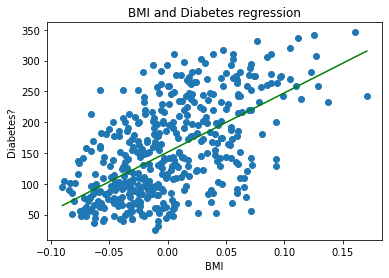

In [ ]:
# Plot linear regression
m = np.squeeze(lin_reg.coef_)
b = np.squeeze(lin_reg.intercept_)

x = [X.min(), X.max()]
y = m * x + b

print(x,y)

plt.scatter(X, Y)
plt.plot(x,y, color='g')
plt.title("BMI and Diabetes regression")
plt.xlabel("BMI")
plt.ylabel("Diabetes?")